In [30]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt #Added matplotlib
from pathlib import Path
import numpy as np
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [31]:
# Use Path to open csvs.
laws_path = Path('Resources/CDC_Nutrition__Physical_Activity__and_Obesity_-_Legislation.csv')
deaths_path = Path('Resources/NCHS_-_Leading_Causes_of_Death__United_States.csv')
pop_path = Path('Resources/sc-est2017-alldata5.csv')

In [32]:
# Use Pandas to the read Legislature data.
laws_df = pd.read_csv(laws_path)

# Cleaning Data Set
laws_df = laws_df.drop(columns = ['Quarter', 'DataSource', 'Comments', 'EnactedDate', 'EffectiveDate', 
                                  'GeoLocation', 'PolicyTypeID', 'HealthTopicID', 'PolicyTopicID', 'Title',
                                 'SettingID', 'ProvisionID', 'Citation','StatusAltValue','DataType','DisplayOrder'])
laws_df = laws_df.rename(columns={'LocationAbbr': 'StateAbbr',
                                 'LocationDesc': 'State'})

laws_df.head()

,Year,StateAbbr,State,HealthTopic,PolicyTopic,Setting,Status
0,2009,CO,Colorado,Nutrition,Appropriations,School/After School,Enacted
1,2010,KY,Kentucky,Obesity,Food Restrictions,Community,Enacted
2,2010,KY,Kentucky,Physical Activity,Bicycling,Community,Enacted
3,2010,TX,Texas,Obesity,Sugar Sweetened Beverages,Early Care and Education,Enacted
4,2009,CO,Colorado,Nutrition,Agriculture and Farming,Community,Enacted


In [33]:
# Use Pandas to the read Legislature data
deaths_df = pd.read_csv(deaths_path)
deaths_df = deaths_df.rename(columns={'113 Cause Name': 'Full Cause Name',
                                     'State':'NAME'})
deaths_df['Year'] = deaths_df['Year'].astype('str')
deaths_df.dtypes

Year                        object
Full Cause Name             object
Cause Name                  object
NAME                        object
Deaths                       int64
Age-adjusted Death Rate    float64
dtype: object

In [34]:
# Grouping the population data frame to get sums for each year 
pop_df = pd.read_csv(pop_path)
pop_df = pop_df.drop(columns=['SUMLEV','REGION','DIVISION','STATE','SEX','ORIGIN','RACE','AGE','CENSUS2010POP','ESTIMATESBASE2010'])
grouped_pop = pop_df.groupby(['NAME'])

# Cleaning the grouped data frame
grouped_pop = grouped_pop[['POPESTIMATE2010','POPESTIMATE2011','POPESTIMATE2012','POPESTIMATE2013','POPESTIMATE2014',
                          'POPESTIMATE2015','POPESTIMATE2016','POPESTIMATE2017']].sum()
grouped_pop = grouped_pop.rename(columns={'POPESTIMATE2010':'2010','POPESTIMATE2011':'2011','POPESTIMATE2012':'2012',
                                          'POPESTIMATE2013':'2013','POPESTIMATE2014':'2014','POPESTIMATE2015':'2015',
                                          'POPESTIMATE2016':'2016','POPESTIMATE2017':'2017'})
grouped_pop = grouped_pop.reset_index()

# Setting up a new data frame to be able to merge the population with the deaths
merge_pop = pd.melt(grouped_pop, id_vars=["NAME"], var_name='Year', value_name='Population')

merge_pop.dtypes

NAME          object
Year          object
Population     int64
dtype: object

In [35]:
merged_df = pd.merge(merge_pop,deaths_df, on=(['NAME','Year']),how='left')
merged_df['Death Percentage'] = (merged_df['Deaths'] / merged_df['Population']) * 100
merged_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
0,Alabama,2010,19418292,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,2394,49.6,0.012329
1,Alabama,2010,19418292,All Causes,All causes,48038,939.7,0.247385
2,Alabama,2010,19418292,Alzheimer's disease (G30),Alzheimer's disease,1523,31.2,0.007843
3,Alabama,2010,19418292,Cerebrovascular diseases (I60-I69),Stroke,2619,51.6,0.013487
4,Alabama,2010,19418292,Chronic lower respiratory diseases (J40-J47),CLRD,2866,55.4,0.014759
...,...,...,...,...,...,...,...,...
4483,Wyoming,2017,2369120,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1001,148.9,0.042252
4484,Wyoming,2017,2369120,Influenza and pneumonia (J09-J18),Influenza and pneumonia,115,17.5,0.004854
4485,Wyoming,2017,2369120,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,157,26.9,0.006627
4486,Wyoming,2017,2369120,Malignant neoplasms (C00-C97),Cancer,948,136.1,0.040015


In [36]:
#Filter df for only stroke for cause of death
stroke_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Stroke'].index)
stroke_df = stroke_df.sort_values(by = ["NAME", "Year"])
stroke_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
3,Alabama,2010,19418292,Cerebrovascular diseases (I60-I69),Stroke,2619,51.6,0.013487
564,Alabama,2011,19481828,Cerebrovascular diseases (I60-I69),Stroke,2568,49.4,0.013182
1125,Alabama,2012,19554796,Cerebrovascular diseases (I60-I69),Stroke,2628,49.5,0.013439
1686,Alabama,2013,19620044,Cerebrovascular diseases (I60-I69),Stroke,2604,48.1,0.013272
2247,Alabama,2014,19679068,Cerebrovascular diseases (I60-I69),Stroke,2663,48.3,0.013532
...,...,...,...,...,...,...,...,...
2236,Wyoming,2013,2375636,Cerebrovascular diseases (I60-I69),Stroke,213,35.1,0.008966
2797,Wyoming,2014,2381044,Cerebrovascular diseases (I60-I69),Stroke,189,30.2,0.007938
3358,Wyoming,2015,2394136,Cerebrovascular diseases (I60-I69),Stroke,198,31.4,0.008270
3919,Wyoming,2016,2390424,Cerebrovascular diseases (I60-I69),Stroke,208,31.7,0.008701


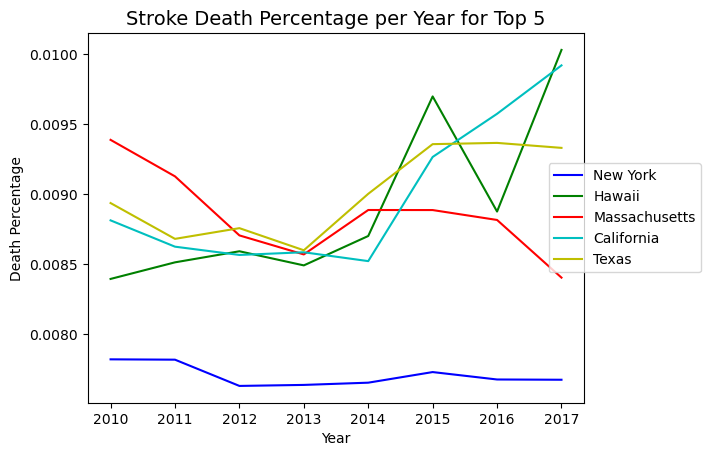

In [37]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = stroke_df.loc[stroke_df["NAME"]=="New York"]
hawaii = stroke_df.loc[stroke_df["NAME"]=="Hawaii"]
mass = stroke_df.loc[stroke_df["NAME"]=="Massachusetts"]
cali = stroke_df.loc[stroke_df["NAME"]=="California"]
texas = stroke_df.loc[stroke_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = stroke_df.loc[stroke_df["NAME"]=="Alaska"]
wyoming = stroke_df.loc[stroke_df["NAME"]=="Wyoming"]
kansas = stroke_df.loc[stroke_df["NAME"]=="Kansas"]
s_dakota =stroke_df.loc[stroke_df["NAME"]=="South Dakota"]
n_dakota = stroke_df.loc[stroke_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for stoke
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Stroke Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

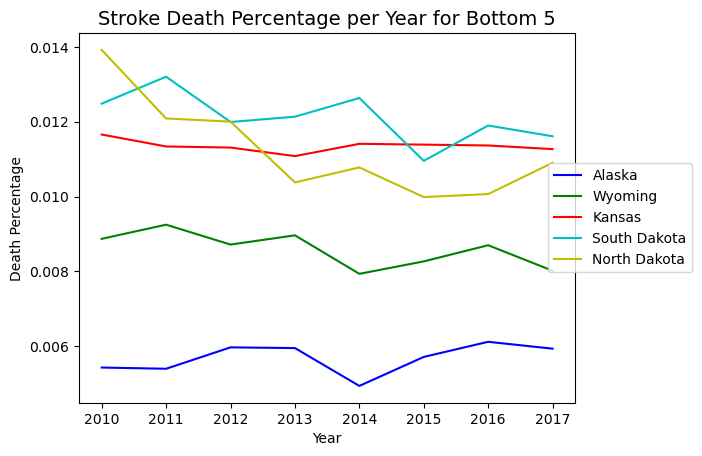

In [38]:
#Make line graph for bottom 5 states for stroke
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Stroke Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.25, 0.5))
plt.show()

In [39]:
# Grouping the laws data frame to get counts
grouped_laws = laws_df.sort_values(by = ['State','HealthTopic'])
grouped_laws = grouped_laws.groupby(['State','Year','HealthTopic'])

laws_per_year = grouped_laws.count()
laws_per_year = laws_per_year.drop(columns=['StateAbbr', 'PolicyTopic','Setting'])
laws_per_year = laws_per_year.rename(columns={'Status':'Count'})
laws_per_year

Count
State   Year HealthTopic             
Alabama 2001 Nutrition              8
        2002 Nutrition              8
        2003 Nutrition              1
             Physical Activity      2
        2004 Nutrition              3
...                               ...
Wyoming 2013 Nutrition              5
             Obesity                1
             Physical Activity      1
        2016 Physical Activity      1
        2017 Nutrition              2

[1372 rows x 1 columns]

In [40]:
#Filter df for only suicide for cause of death
suicide_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Suicide'].index)
suicide_df = suicide_df.sort_values(by = ["NAME", "Year"])
suicide_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
8,Alabama,2010,19418292,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,679,14.0,0.003497
569,Alabama,2011,19481828,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,654,13.2,0.003357
1130,Alabama,2012,19554796,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,724,14.7,0.003702
1691,Alabama,2013,19620044,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,721,14.4,0.003675
2252,Alabama,2014,19679068,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,715,14.5,0.003633
...,...,...,...,...,...,...,...,...
2241,Wyoming,2013,2375636,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,129,21.5,0.005430
2802,Wyoming,2014,2381044,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,120,20.6,0.005040
3363,Wyoming,2015,2394136,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,157,28.0,0.006558
3924,Wyoming,2016,2390424,"Intentional self-harm (suicide) (*U03,X60-X84,...",Suicide,144,25.2,0.006024


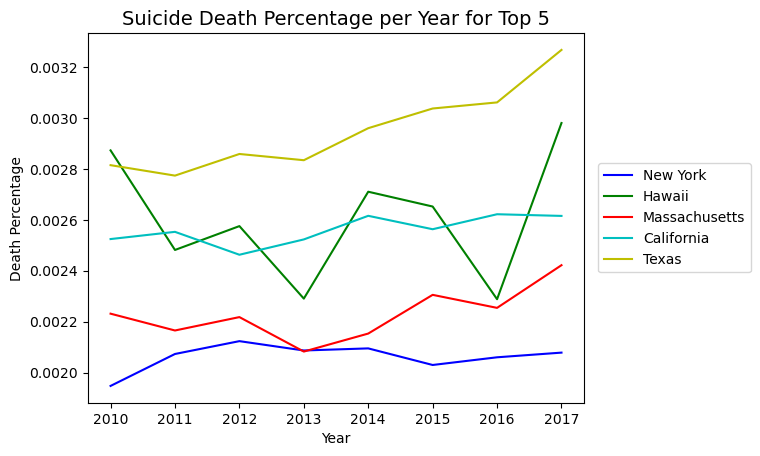

In [41]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = suicide_df.loc[suicide_df["NAME"]=="New York"]
hawaii = suicide_df.loc[suicide_df["NAME"]=="Hawaii"]
mass = suicide_df.loc[suicide_df["NAME"]=="Massachusetts"]
cali = suicide_df.loc[suicide_df["NAME"]=="California"]
texas = suicide_df.loc[suicide_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = suicide_df.loc[suicide_df["NAME"]=="Alaska"]
wyoming = suicide_df.loc[suicide_df["NAME"]=="Wyoming"]
kansas = suicide_df.loc[suicide_df["NAME"]=="Kansas"]
s_dakota = suicide_df.loc[suicide_df["NAME"]=="South Dakota"]
n_dakota = suicide_df.loc[suicide_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for suicide
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Suicide Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

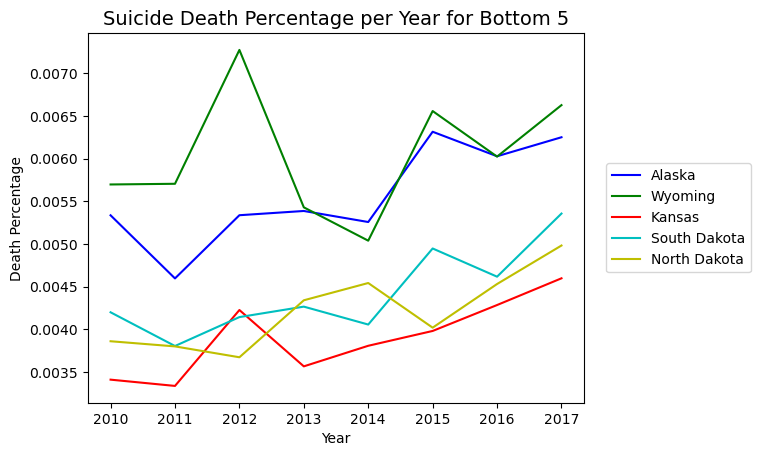

In [42]:
#Make line graph for bottom 5 states for suicide
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Suicide Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [45]:
#Filter df for only kidney disease for cause of death
kidney_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Kidney disease'].index)
kidney_df = kidney_df.sort_values(by = ["NAME", "Year"])
kidney_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
10,Alabama,2010,19418292,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1184,23.1,0.006097
571,Alabama,2011,19481828,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1047,20.0,0.005374
1132,Alabama,2012,19554796,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1035,19.4,0.005293
1693,Alabama,2013,19620044,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1057,19.3,0.005387
2254,Alabama,2014,19679068,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,1011,18.2,0.005137
...,...,...,...,...,...,...,...,...
2243,Wyoming,2013,2375636,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,56,9.4,0.002357
2804,Wyoming,2014,2381044,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,78,12.2,0.003276
3365,Wyoming,2015,2394136,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,86,13.3,0.003592
3926,Wyoming,2016,2390424,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,66,10.0,0.002761


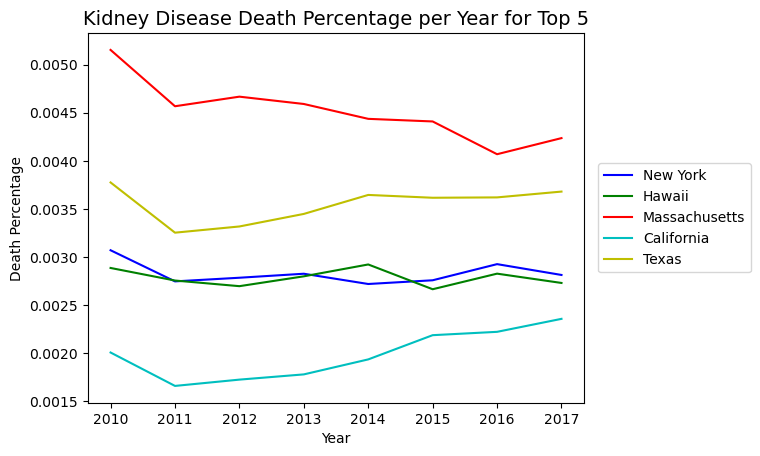

In [46]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = kidney_df.loc[kidney_df["NAME"]=="New York"]
hawaii = kidney_df.loc[kidney_df["NAME"]=="Hawaii"]
mass = kidney_df.loc[kidney_df["NAME"]=="Massachusetts"]
cali = kidney_df.loc[kidney_df["NAME"]=="California"]
texas = kidney_df.loc[kidney_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = kidney_df.loc[kidney_df["NAME"]=="Alaska"]
wyoming = kidney_df.loc[kidney_df["NAME"]=="Wyoming"]
kansas = kidney_df.loc[kidney_df["NAME"]=="Kansas"]
s_dakota = kidney_df.loc[kidney_df["NAME"]=="South Dakota"]
n_dakota = kidney_df.loc[kidney_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for kidney disease
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Kidney Disease Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

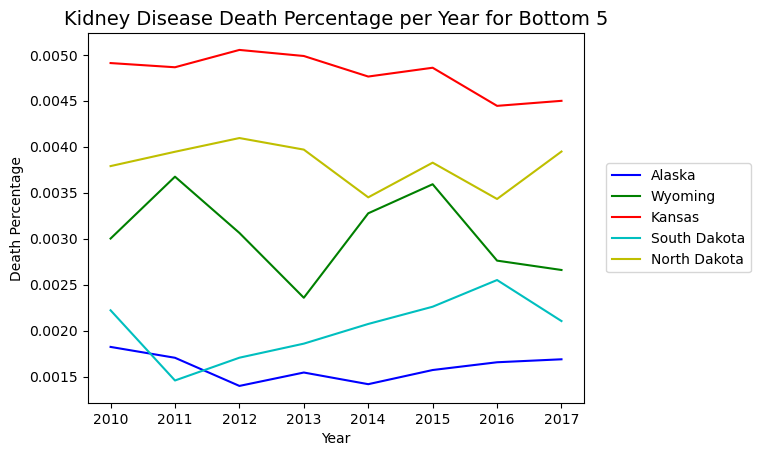

In [47]:
#Make line graph for bottom 5 states for kidney disease
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Kidney Disease Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [48]:
#Filter df for only heart disease for cause of death
heart_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Heart disease'].index)
heart_df = heart_df.sort_values(by = ["NAME", "Year"])
heart_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
6,Alabama,2010,19418292,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12083,236.0,0.062225
567,Alabama,2011,19481828,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,11942,228.7,0.061298
1128,Alabama,2012,19554796,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12036,225.1,0.061550
1689,Alabama,2013,19620044,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12472,228.4,0.063568
2250,Alabama,2014,19679068,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,12461,224.0,0.063321
...,...,...,...,...,...,...,...,...
2239,Wyoming,2013,2375636,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,939,152.4,0.039526
2800,Wyoming,2014,2381044,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1035,162.2,0.043468
3361,Wyoming,2015,2394136,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1030,159.4,0.043022
3922,Wyoming,2016,2390424,"Diseases of heart (I00-I09,I11,I13,I20-I51)",Heart disease,1051,157.8,0.043967


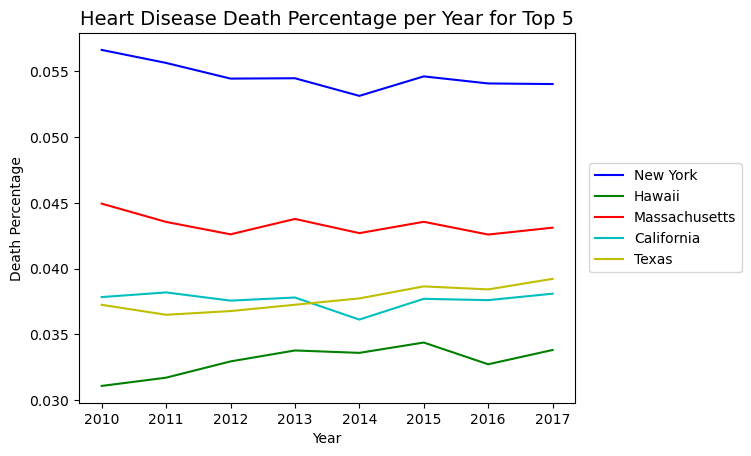

In [49]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = heart_df.loc[heart_df["NAME"]=="New York"]
hawaii = heart_df.loc[heart_df["NAME"]=="Hawaii"]
mass = heart_df.loc[heart_df["NAME"]=="Massachusetts"]
cali = heart_df.loc[heart_df["NAME"]=="California"]
texas = heart_df.loc[heart_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = heart_df.loc[heart_df["NAME"]=="Alaska"]
wyoming = heart_df.loc[heart_df["NAME"]=="Wyoming"]
kansas = heart_df.loc[heart_df["NAME"]=="Kansas"]
s_dakota = heart_df.loc[heart_df["NAME"]=="South Dakota"]
n_dakota = heart_df.loc[heart_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for Heart Disease
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Heart Disease Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

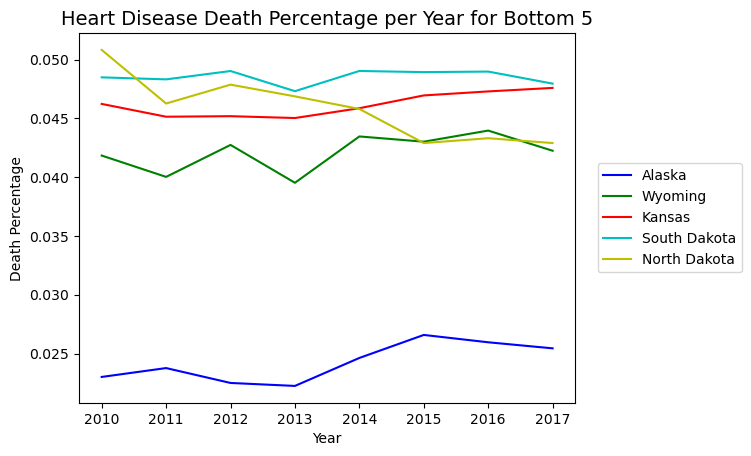

In [50]:
#Make line graph for bottom 5 states for heart disease
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Heart Disease Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [51]:
#Filter df for only diabetes for cause of death
diabetes_df = merged_df.drop(merged_df[merged_df['Cause Name'] != 'Diabetes'].index)
diabetes_df = diabetes_df.sort_values(by = ["NAME", "Year"])
diabetes_df

,NAME,Year,Population,Full Cause Name,Cause Name,Deaths,Age-adjusted Death Rate,Death Percentage
5,Alabama,2010,19418292,Diabetes mellitus (E10-E14),Diabetes,1302,25.0,0.006705
566,Alabama,2011,19481828,Diabetes mellitus (E10-E14),Diabetes,1278,23.9,0.006560
1127,Alabama,2012,19554796,Diabetes mellitus (E10-E14),Diabetes,1300,23.9,0.006648
1688,Alabama,2013,19620044,Diabetes mellitus (E10-E14),Diabetes,1349,24.3,0.006876
2249,Alabama,2014,19679068,Diabetes mellitus (E10-E14),Diabetes,1281,22.8,0.006509
...,...,...,...,...,...,...,...,...
2238,Wyoming,2013,2375636,Diabetes mellitus (E10-E14),Diabetes,89,14.2,0.003746
2799,Wyoming,2014,2381044,Diabetes mellitus (E10-E14),Diabetes,110,17.6,0.004620
3360,Wyoming,2015,2394136,Diabetes mellitus (E10-E14),Diabetes,136,20.8,0.005681
3921,Wyoming,2016,2390424,Diabetes mellitus (E10-E14),Diabetes,112,16.6,0.004685


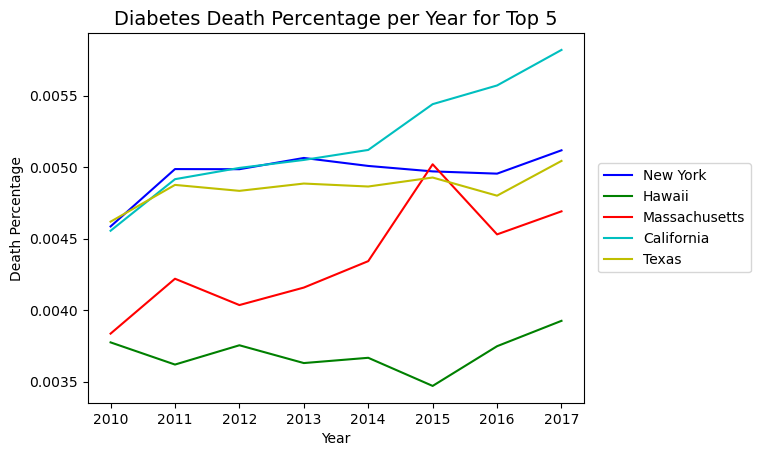

In [52]:
#Set parameters for state data
#Top 5 states for legislation passed
new_york = diabetes_df.loc[diabetes_df["NAME"]=="New York"]
hawaii = diabetes_df.loc[diabetes_df["NAME"]=="Hawaii"]
mass = diabetes_df.loc[diabetes_df["NAME"]=="Massachusetts"]
cali = diabetes_df.loc[diabetes_df["NAME"]=="California"]
texas = diabetes_df.loc[diabetes_df["NAME"]=="Texas"]

#Bottom 5 states for legislation passed
alaska = diabetes_df.loc[diabetes_df["NAME"]=="Alaska"]
wyoming = diabetes_df.loc[diabetes_df["NAME"]=="Wyoming"]
kansas = diabetes_df.loc[diabetes_df["NAME"]=="Kansas"]
s_dakota = diabetes_df.loc[diabetes_df["NAME"]=="South Dakota"]
n_dakota = diabetes_df.loc[diabetes_df["NAME"]=="North Dakota"]

#Make a line graph fot Top 5 states for Heart Disease
plt.plot(new_york["Year"], new_york["Death Percentage"], color = "b", label = "New York")
plt.plot(hawaii["Year"], hawaii["Death Percentage"], color = "g", label = "Hawaii")
plt.plot(mass["Year"], mass["Death Percentage"], color = "r", label = "Massachusetts")
plt.plot(cali["Year"], cali["Death Percentage"], color = "c", label = "California")
plt.plot(texas["Year"], texas["Death Percentage"], color = "y", label = "Texas")
plt.title("Diabetes Death Percentage per Year for Top 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

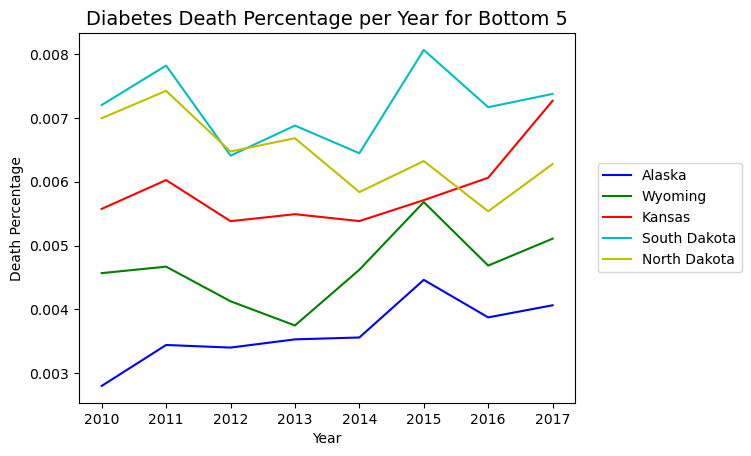

In [53]:
#Make line graph for bottom 5 states for heart disease
plt.plot(alaska["Year"], alaska["Death Percentage"], color = "b", label = "Alaska")
plt.plot(wyoming["Year"], wyoming["Death Percentage"], color = "g", label = "Wyoming")
plt.plot(kansas["Year"], kansas["Death Percentage"], color = "r", label = "Kansas")
plt.plot(s_dakota["Year"], s_dakota["Death Percentage"], color = "c", label = "South Dakota")
plt.plot(n_dakota["Year"], n_dakota["Death Percentage"], color = "y", label = "North Dakota")
plt.title("Diabetes Death Percentage per Year for Bottom 5", fontsize = 14)
plt.xlabel("Year")
plt.ylabel("Death Percentage")
plt.legend(loc='center right', bbox_to_anchor=(1.35, 0.5))
plt.show()

In [ ]:
# Create a boxplot to compare means
suicide_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

In [ ]:
# Create a boxplot to compare means
diabetes_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

In [ ]:
# Create a boxplot to compare means
heart_df.boxplot("Death Percentage", by="Year", figsize=(20, 10))

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2010"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2010"]["Death Percentage"]

# Perform the ANOVA for 2010
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = heart_df.loc[heart_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = heart_df.loc[heart_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2011"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2011"]["Death Percentage"]

# Perform the ANOVA for 2011
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2012"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2012"]["Death Percentage"]

# Perform the ANOVA for 2012
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2013"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2013"]["Death Percentage"]

# Perform the ANOVA for 2013
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2014"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2014"]["Death Percentage"]

# Perform the ANOVA for 2014
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = diabetes_df.loc[diabetes_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2015"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2015"]["Death Percentage"]

# Perform the ANOVA for 2015
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2016"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2016"]["Death Percentage"]

# Perform the ANOVA for 2016
stats.f_oneway(group0, group1)

In [ ]:
#Create dataframe for the five lowest states and the five highest states for suicide
#Finding the p-value between years
lowest_df = suicide_df.loc[suicide_df["NAME"].isin(["Alaska", "Wyoming","Kansas",
                                                     "South Dakota","North Dakota"])]

highest_df = suicide_df.loc[suicide_df["NAME"].isin(["New York", "California","Hawaii",
                                                     "Texas","Massachusetts"])]

# Extract individual groups per year
group0 = lowest_df[lowest_df["Year"] == "2017"]["Death Percentage"]
group1 = highest_df[highest_df["Year"] == "2017"]["Death Percentage"]

# Perform the ANOVA for 2017
stats.f_oneway(group0, group1)